In [1]:
from fastai.vision import *

In [2]:
from torch.optim import Optimizer

In [3]:
PATH = Path("/Users/akash/.fastai/data/cifar10")

In [4]:
PATH.ls()

[PosixPath('/Users/akash/.fastai/data/cifar10/.DS_Store'),
 PosixPath('/Users/akash/.fastai/data/cifar10/test'),
 PosixPath('/Users/akash/.fastai/data/cifar10/train')]

In [5]:
pad4 = RandTransform(tfm=pad, kwargs={'padding':4, 'mode':'zeros'}, is_random=False, p=1.0, use_on_y=False)
crop32 = RandTransform(tfm=crop, kwargs={'row_pct':(0.4,0.6), 'col_pct':(0.4,0.6), 'size':32}, p=1.0, use_on_y=False)
tfms = [pad4, crop32]

data = ImageDataBunch.from_folder(path=PATH, train='train', valid='test', tfms=tfms)

In [6]:
def get_data(bs=16):
    data = (ImageList.from_folder(path=PATH)
            .split_by_folder(train='train', valid='test')
            .label_from_folder()
            .transform((tfms, []))
            .databunch(bs=bs))
    return data

In [7]:
data = get_data()

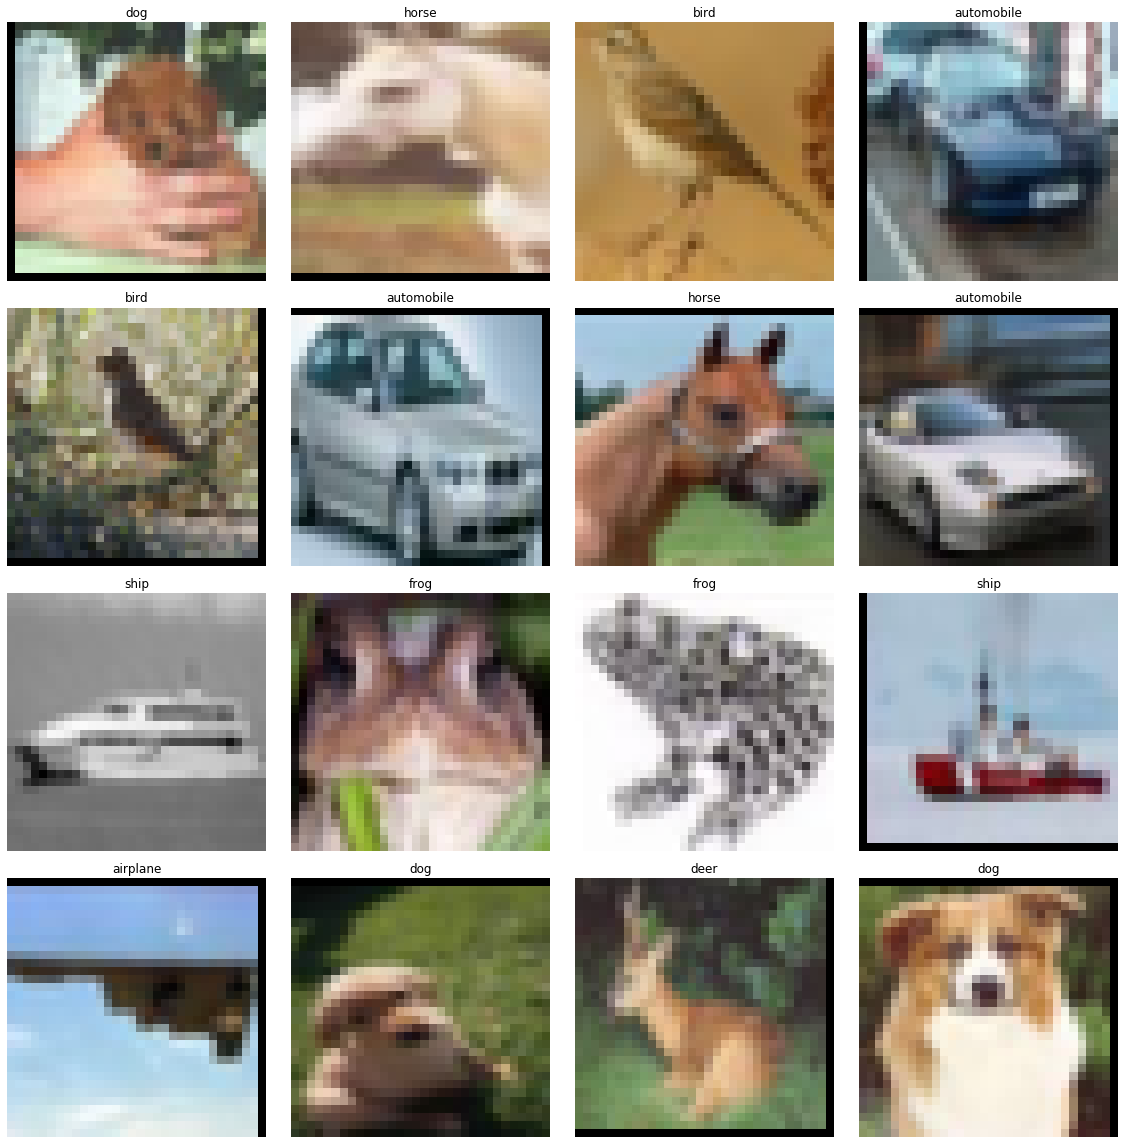

In [8]:
data.show_batch()